In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [3]:
# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
rows=400
X = diabetes.data[:rows]
y = diabetes.target[:rows]

In [32]:
# These didn't work, or had extreme R2-values
'''
'''
classif_list = \
[
    ElasticNet(),
    Lasso(),
    SGDRegressor(),
    SVR(),
    KernelRidge(),
    RandomForestRegressor(),    
    LinearRegression(),
    Ridge(),    
    LinearSVR(),
    GradientBoostingRegressor()
]

for elem in classif_list:
    name = type(elem).__name__
    try:
        #pipe = make_pipeline(SimpleImputer(), elem)        
        %time cv = cross_val_score(elem, X, y)
        print(f"For {name} the R2 score is: {cv.mean():.4f}\n")
    except:
        print(f"\t{name} failed\n")

CPU times: user 38.1 ms, sys: 113 µs, total: 38.2 ms
Wall time: 37.1 ms
For ElasticNet the R2 score is: -0.0118

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 21.6 ms
For Lasso the R2 score is: 0.3250



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

CPU times: user 236 ms, sys: 4.02 ms, total: 240 ms
Wall time: 240 ms
For SGDRegressor the R2 score is: 0.3792

CPU times: user 53 ms, sys: 50 µs, total: 53 ms
Wall time: 51.9 ms
For SVR the R2 score is: 0.1316

CPU times: user 80.5 ms, sys: 43.6 ms, total: 124 ms
Wall time: 37.6 ms
For KernelRidge the R2 score is: -3.7269

CPU times: user 1.49 s, sys: 148 ms, total: 1.63 s
Wall time: 1.35 s
For RandomForestRegressor the R2 score is: 0.4121

CPU times: user 6.9 ms, sys: 0 ns, total: 6.9 ms
Wall time: 6.7 ms
For LinearRegression the R2 score is: 0.4604

CPU times: user 6.35 ms, sys: 99 µs, total: 6.45 ms
Wall time: 6.17 ms
For Ridge the R2 score is: 0.3907

CPU times: user 6.63 ms, sys: 0 ns, total: 6.63 ms
Wall time: 6.54 ms
For LinearSVR the R2 score is: -0.4229

CPU times: user 397 ms, sys: 0 ns, total: 397 ms
Wall time: 400 ms
For GradientBoostingRegressor the R2 score is: 0.3936



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

KeyboardInterrupt: 

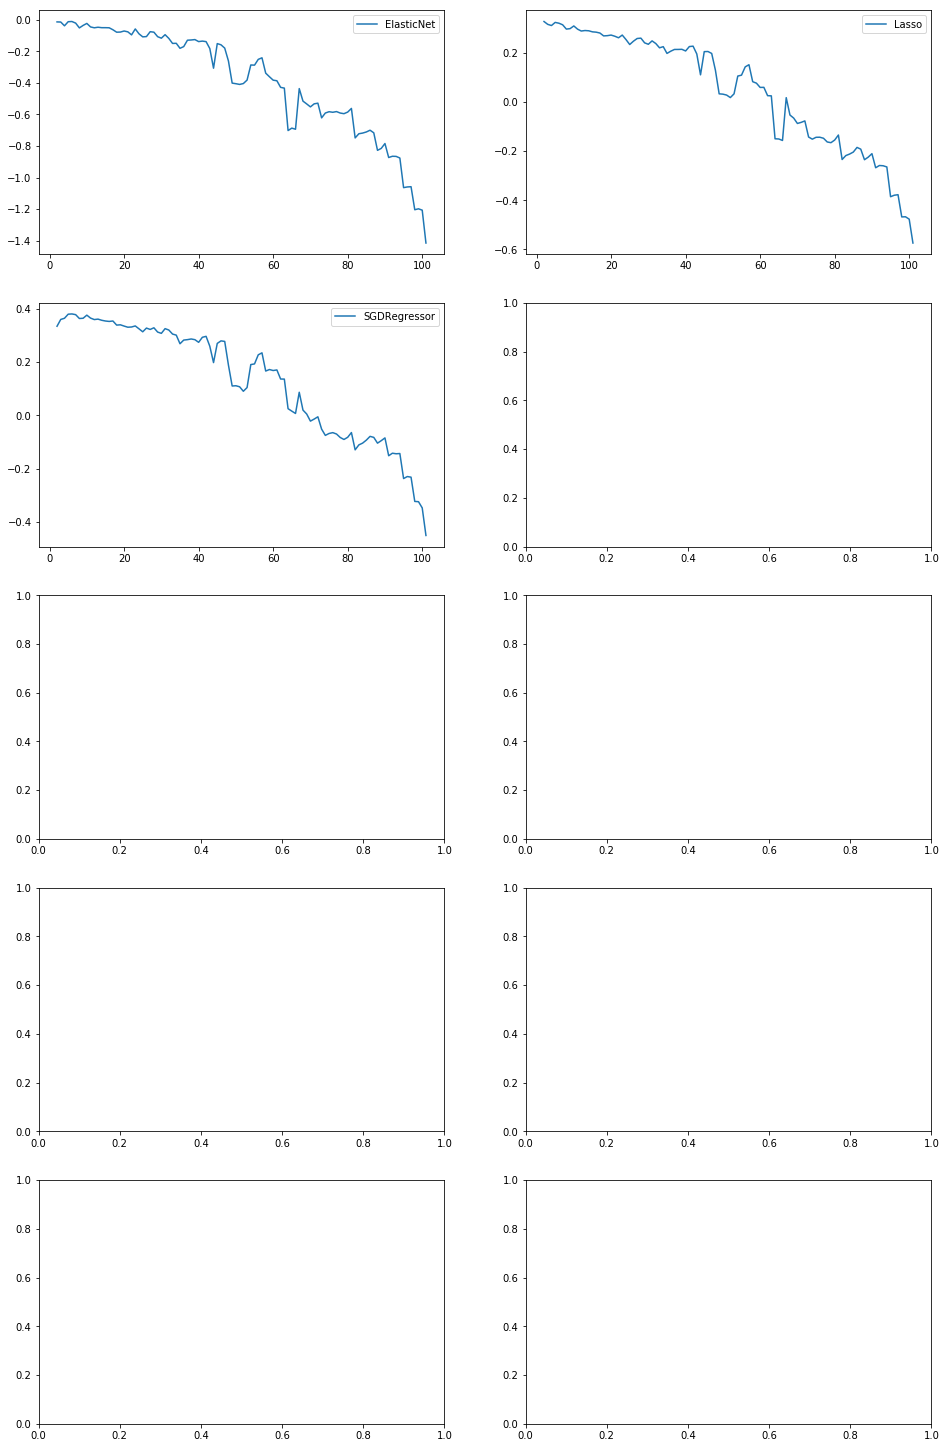

In [39]:
fig, axes = plt.subplots(5,2,figsize=[16,26])

axes = axes.reshape(10,)
elem = classif_list[0]
m=0
for elem in classif_list:
    
    ax = axes[m]
    
    
    name = type(elem).__name__
    cvs = []
    nr_of_splits = 100
    nr_of_splits = range(2,nr_of_splits+2)
    for n in nr_of_splits:
        if name == 'SGDRegressor':
            n=5
        cv =cross_val_score(elem, X, y, cv=n)
        cvs.append(cv.mean())

    ax.plot(nr_of_splits, cvs, label=name)
    ax.legend()
    
    m+=1
#plt.title(name)

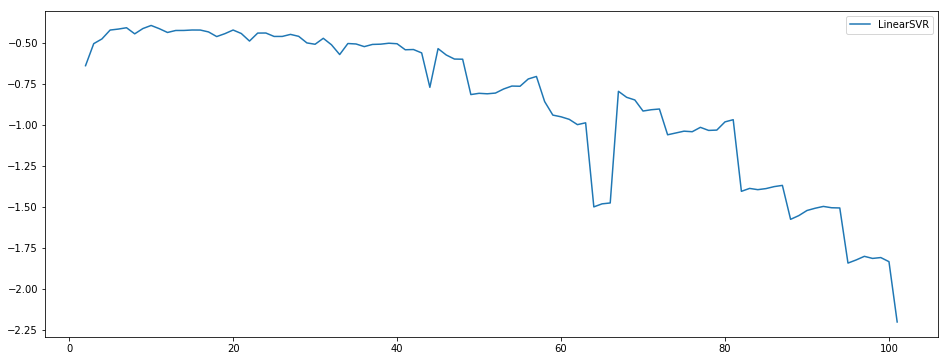

In [51]:
plt.figure(figsize=[16,6])
elem = classif_list[8]
#elem = SGDRegressor(max_iter=10000)
name = type(elem).__name__
cvs = []
nr_of_splits = 100
nr_of_splits = range(2,nr_of_splits+2)
for n in nr_of_splits:
    cv =cross_val_score(elem, X, y, cv=n)
    cvs.append(cv.mean())

plt.plot(nr_of_splits,cvs, label=name)
plt.legend();

In [58]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



In [60]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

In [120]:
from sklearn.preprocessing.MinMaxScaler()
from sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing.RobustScaler
from sklearn.preprocessing.StandardScaler

from sklearn.preprocessing.Binarizer
from sklearn.preprocessing.LabelBinarizer
from sklearn.preprocessing.MultiLabelBinarizer

from sklearn.preprocessing.KBinsDiscretizer

from sklearn.preprocessing.KernelCenterer

from sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing.OneHotEncoder
from sklearn.preprocessing.OrdinalEncoder

from sklearn.preprocessing.Normalizer

from sklearn.preprocessing.PolynomialFeatures

from sklearn.preprocessing.PowerTransformer
from sklearn.preprocessing.QuantileTransformer

1

In [93]:

samp = np.random.random(1000)

In [94]:
samp100 = 100*samp

In [95]:
stasca = StandardScaler()

In [103]:
sssamp = stasca.fit(samp100.reshape(-1, 1))

In [104]:
samp.mean()

0.5057398106138581

In [105]:
sssamp1 = sssamp.transform(samp100.reshape(-1, 1))

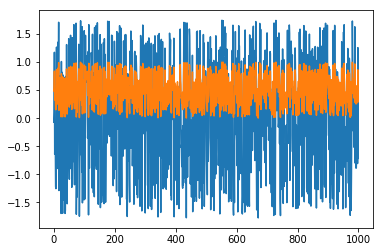

In [107]:
plt.plot(sssamp1[:,0])
plt.plot(samp)

In [118]:
samp0 = (samp - samp.mean())/0.25 #/samp.std()

(0, 20)

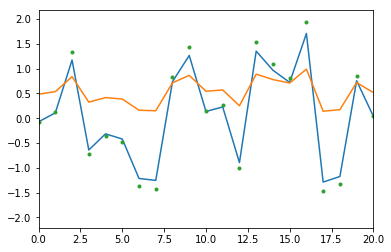

In [119]:
plt.plot(sssamp1[:,0])
plt.plot(samp)
plt.plot(samp0, '.')
plt.xlim(0)

In [117]:
samp.std()

0.28315668310855313

In [126]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
'''classif_list = \
[
    ElasticNet(),
    Lasso(),
    SGDRegressor(),
    SVR(),
    KernelRidge(),
    RandomForestRegressor(),    
    LinearRegression(),
    Ridge(),    
    LinearSVR(),
    GradientBoostingRegressor()
]


'''

In [127]:
classifiers = [
               RandomForestRegressor(),
               GradientBoostingRegressor(),
               lgb.LGBMRegressor(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

clf_names = [
            "rndmforest ", 
            "gbm        ", 
            "lgbm       ", 
            "xgboost    ",
];

In [137]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
rows=400
X = diabetes.data[:rows]
y = diabetes.target[:rows]
len(diabetes['feature_names'])

10

In [140]:
X_pdf = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])

In [142]:
n=0
pdf_co = pd.DataFrame()
for clf_name, clf in zip(clf_names, classifiers):
    coeffs = clf.fit(X, y).feature_importances_
    df_co = pd.DataFrame(coeffs, columns=["importance_"+clf_name.strip()])
    df_co.index = diabetes['feature_names'] #X.columns
    #print(df_co.shape)
    pdf_co = pd.concat([pdf_co, df_co], axis=1)
    #print(df_co.shape, pdf_co.shape)    
    n+=1
    

In [ ]:
               RandomForestRegressor(),
               GradientBoostingRegressor(),
               lgb.LGBMRegressor(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

In [147]:
help(RandomForestRegressor.feature_importances_), GradientBoostingRegressor

Help on property:

    Return the feature importances (the higher, the more important the
       feature).
    
    Returns
    -------
    feature_importances_ : array, shape = [n_features]
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



In [ ]:
[
    ElasticNet(),
    Lasso(),
    SGDRegressor(),
    SVR(),
    KernelRidge(),
    RandomForestRegressor(),    
    LinearRegression(),
    Ridge(),    
    LinearSVR(),
    GradientBoostingRegressor()
]

In [152]:
help(GradientBoostingRegressor())

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
 |      loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |  
 |  learning_rate : float, opt

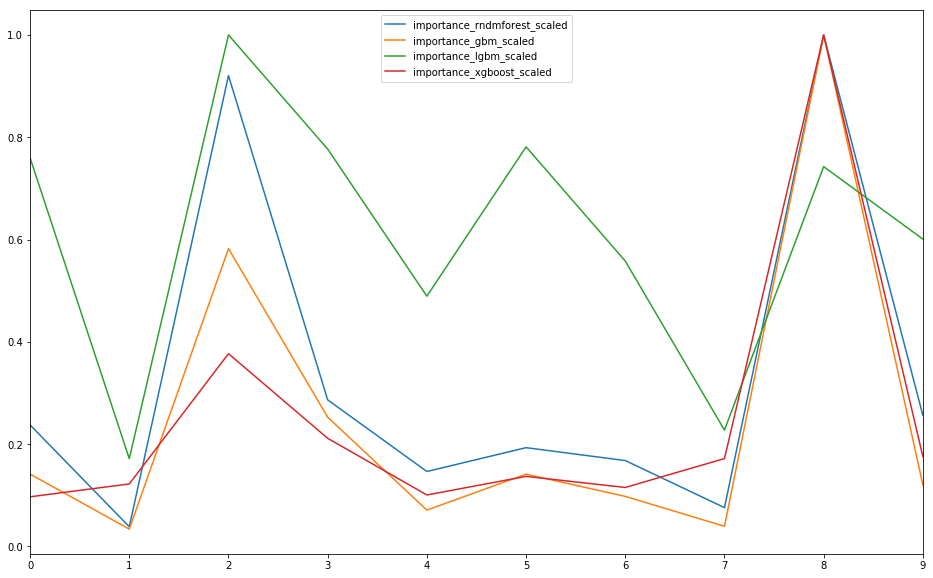

In [141]:
all_cols = ['importance_rndmforest', 'importance_gbm', 'importance_lgbm', 'importance_xgboost']
new_all_cols = []
for col in all_cols:
    new_col = col+'_scaled'
    pdf_co[new_col] = pdf_co[col].apply(lambda x: x/pdf_co[col].max())
    new_all_cols.append(new_col)
fig, ax = plt.subplots(1,1, figsize=(16,10))
pdf_co.reset_index()[new_all_cols].plot(ax=ax)